#### Load Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [2]:
#Load Dataset
all_life_bank_customers = pd.read_excel('Credit Card Customer Data.xlsx')
all_life_bank_customers.shape

(660, 7)

- There are 660 rows and 7 columns

In [3]:
# copy the data to another dataframe
df = all_life_bank_customers.copy()

- check First 5 rows and last 5 rows

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [6]:
# check if there are any missing or null values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- Seems like there are no missing values.

In [7]:
# check quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All are integer types. needs to drop sl_no and customer key column which are not giving much value.

In [8]:
# drop columns Sl_No, Customer Key
df.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

In [9]:
# describe dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


- Avg_Credit_Limit has 200k max, And 75% of the customers are having 48k credit limit.
- Total_Credit_Cards : There are customers who got 10 credit cards, And on an average ~5 cards per customer.
- Total_visits_bank : 50% of the customers visits bank atleast 2 times personally per year. 
- Total_visits_online : on an average each customer visits online app ~2 times.
- Total_calls_made : On an average 3 to 4 calls made by the customer to the bank.

In [10]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Avg_Credit_Limit' are 

 [100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000 157000  94000
 163000 131000  96000 136000 121000 158000 108000 166000 176000 178000
  91000 156000 146000  84000 155000 200000 195000 187000 106000 114000
 126000 173000 153000 184000 123000 144000  97000  98000 127000 171000
 186000 183000 111000 112000 132000  95000 172000  99000 145000 167000]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Total_Credit_Cards' are 

 [ 2  3 

In [11]:
# check if there are any duplicate rows 
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- Seems like there are few duplicate records. Going to drop the duplicate records

In [12]:
# drop duplicate
df.drop_duplicates(inplace=True)

In [13]:
# check duplicates after droping the duplicates
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


### EDA

#### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

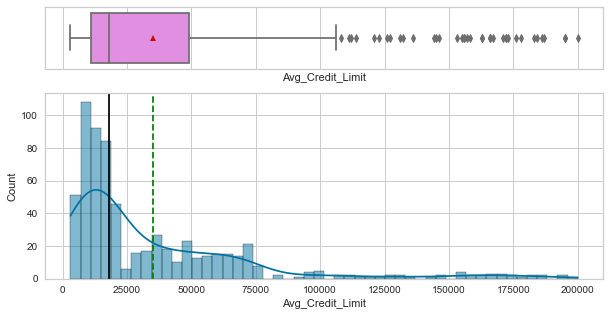

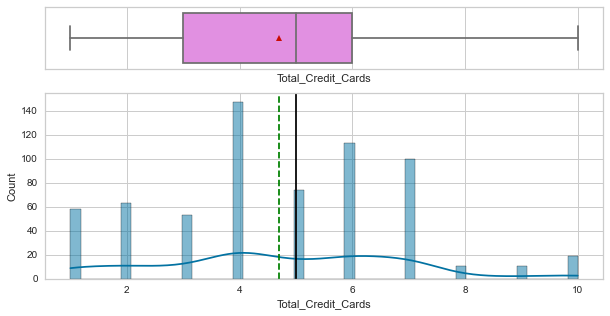

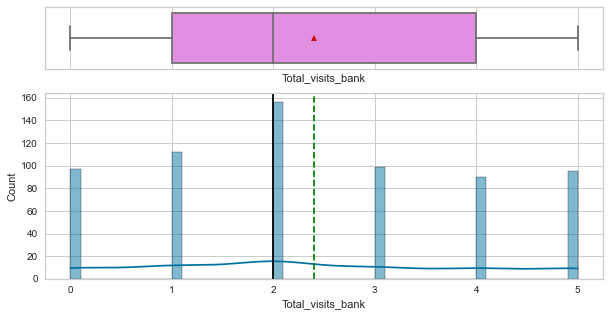

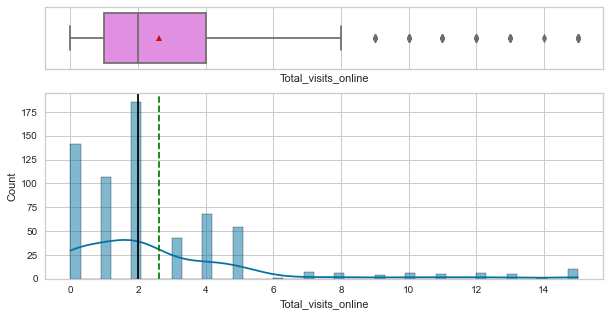

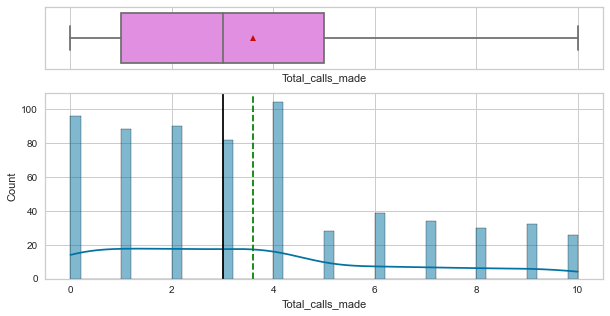

In [15]:
# selecting numerical columns
num_cols = df.select_dtypes(include=int).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

- Average Credit Limit and Total visits online are right skewed. Also we see lot of out liers.
- seems like Total credit cards, Total_Visits_Bank, total calls Made are normally distributed

#### Bivariate Analysis

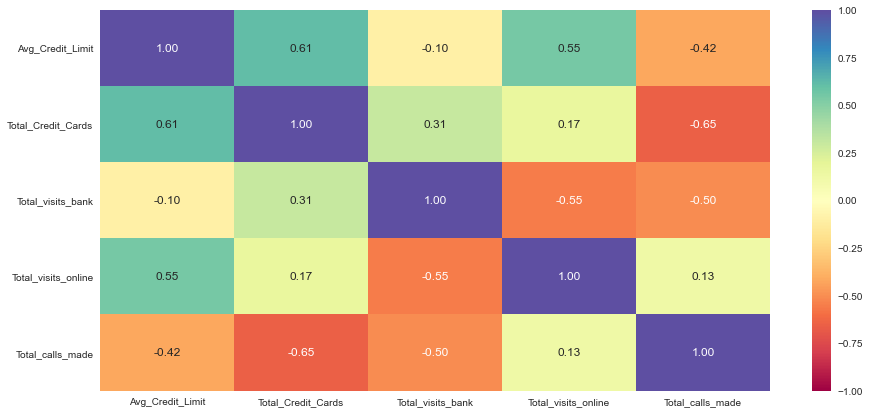

In [16]:
# check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

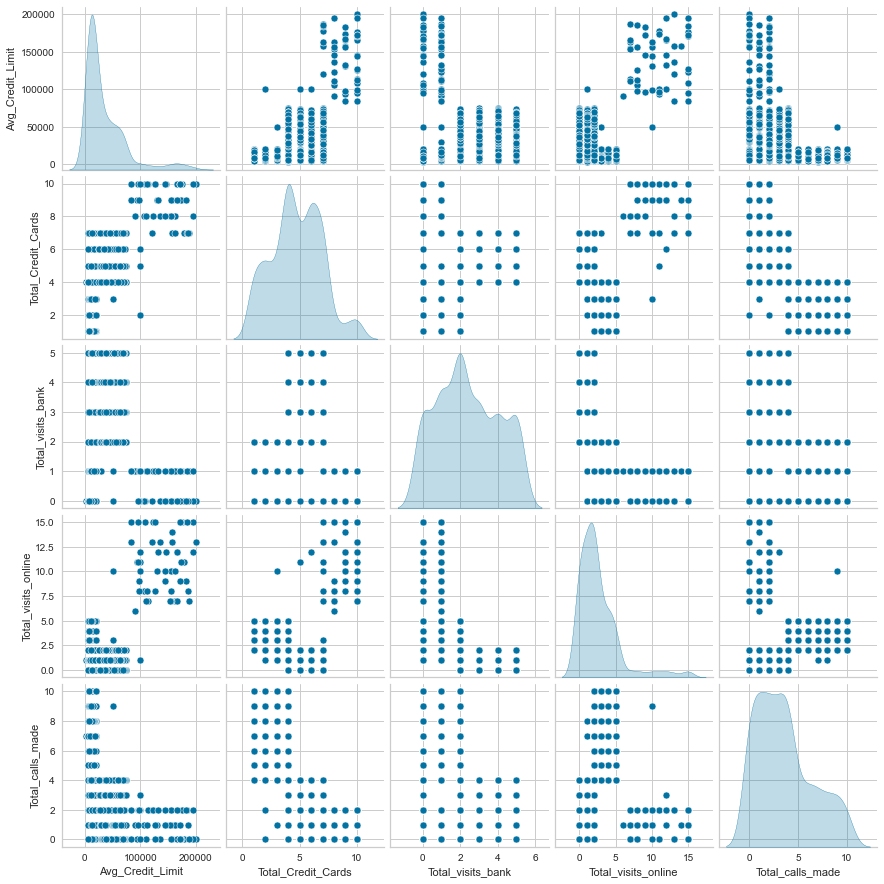

In [17]:
# draw pair plot
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

##### Avg_Credit_Limit  Vs Total_Credit_Cards

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

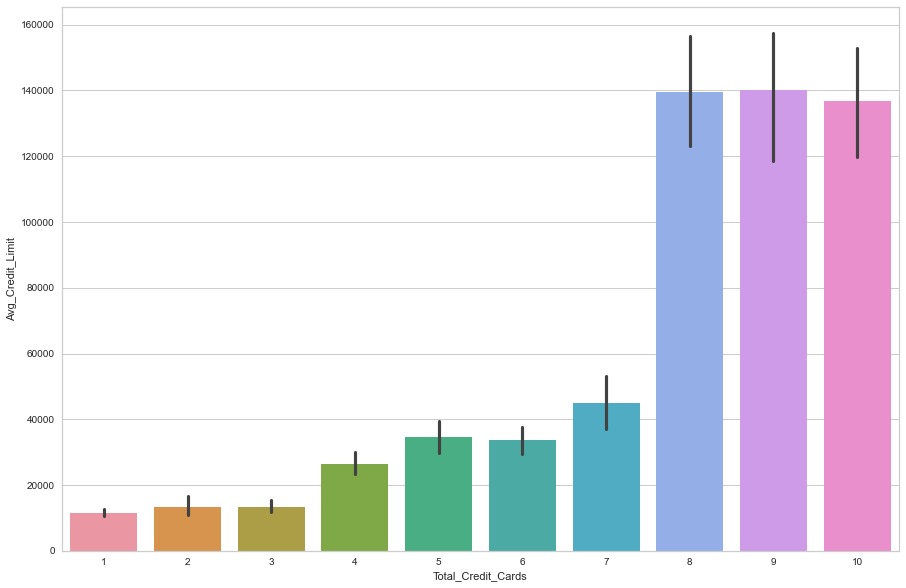

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(y='Avg_Credit_Limit',x='Total_Credit_Cards', data=df, orient="v")

##### Avg_Credit_Limit Vs Total_visits_online

<AxesSubplot:xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

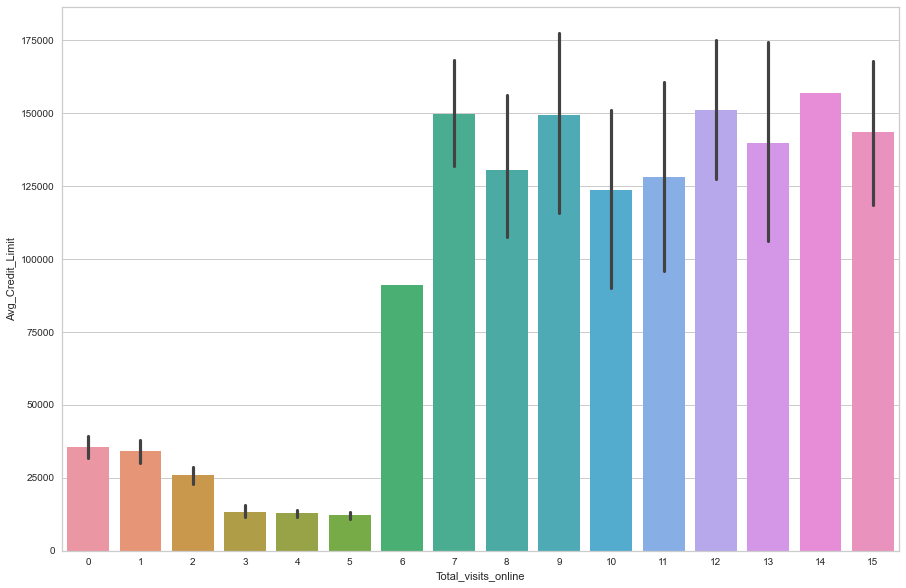

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(y='Avg_Credit_Limit',x='Total_visits_online', data=df, orient="v")

##### Avg_Credit_Limit Vs Total_calls_made

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

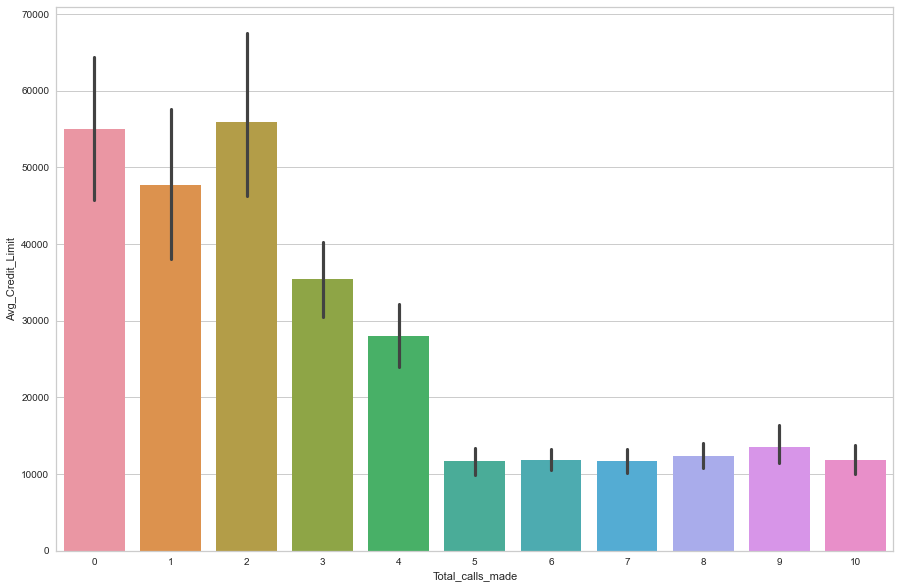

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(y='Avg_Credit_Limit',x='Total_calls_made', data=df, orient="v")

##### Total_Credit_Cards Vs Total_calls_made

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_Credit_Cards'>

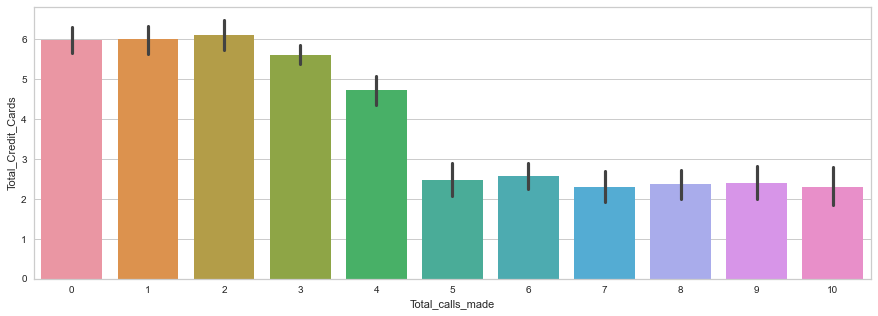

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(y='Total_Credit_Cards',x='Total_calls_made', data=df, orient="v")

##### Total_visits_bank Vs Total_visits_online

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_visits_bank'>

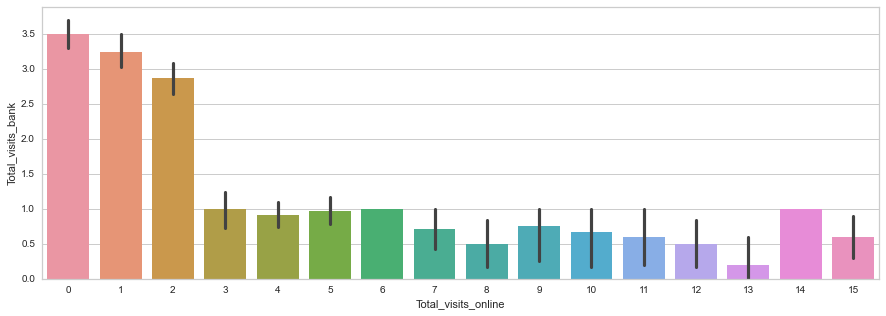

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(y='Total_visits_bank',x='Total_visits_online', data=df, orient="v")

##### Total_visits_bank vs Total_calls_made

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_bank'>

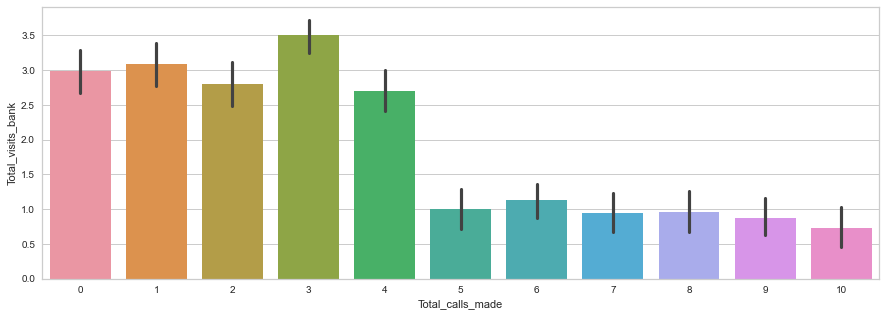

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(y='Total_visits_bank',x='Total_calls_made', data=df, orient="v")

##### Observations :
- Avg_Credit_limit is possitively correlated with Total_credit_cards and Total Visits Online.
- Total_Calls_made is negatively correlated with Avg_credit_limit.
- Total_Credit_cards is negatively correlated with Total calls Made.
- Total_Visits_Bank has negative correlation with Total_Visits_online and Total_calls_Made

### Scale data before clustering

In [25]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [26]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

### K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9877896646529043
Number of Clusters: 6 	Average Distortion: 0.9403649296238265
Number of Clusters: 7 	Average Distortion: 0.9072566973617984
Number of Clusters: 8 	Average Distortion: 0.8867277382886687
Number of Clusters: 9 	Average Distortion: 0.8621886506293598


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

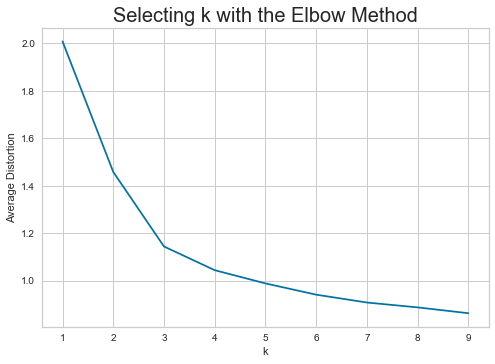

In [27]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- The Appropriate value for k from the above elbow method seems like 3 or 4.

#### check the silhouette scores

For n_clusters = 2, silhouette score is 0.41800025566689647
For n_clusters = 3, silhouette score is 0.516281010855363
For n_clusters = 4, silhouette score is 0.3570238219413198
For n_clusters = 5, silhouette score is 0.2733171907540546
For n_clusters = 6, silhouette score is 0.2565607578847145
For n_clusters = 7, silhouette score is 0.24816565669656462
For n_clusters = 8, silhouette score is 0.22807073808815131
For n_clusters = 9, silhouette score is 0.21153046730251074


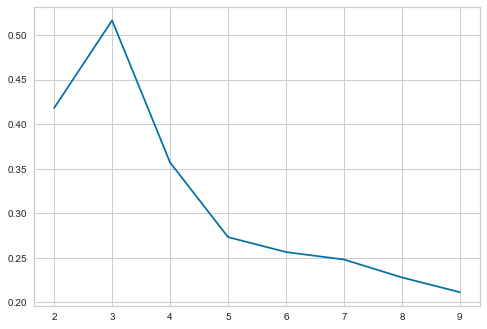

In [28]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- From the silhouette scores, it seems that 3 is a good value of k.
- Lets check for other K values like 2, 4 and 5 using SilhoutteVisualizer

#### Check avarage Silhoutte score using SilhouetteVisualizer for different K values

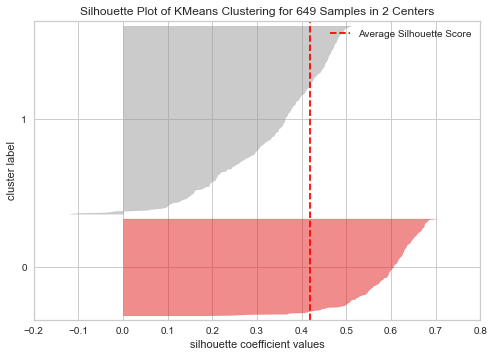

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
# check average silhoutte score for K = 2 
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

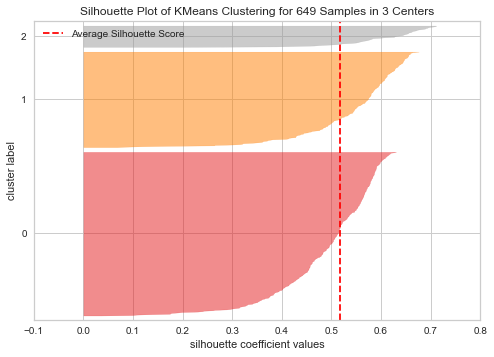

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
# check average silhoutte score for K = 3 
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

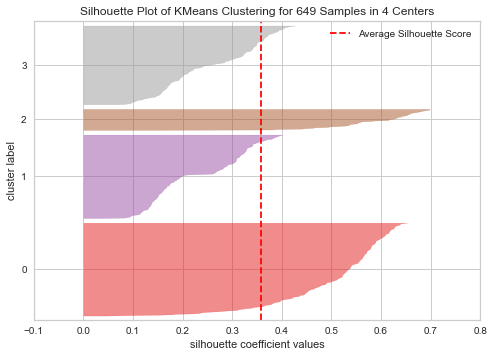

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# check average silhoutte score for K = 4 
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

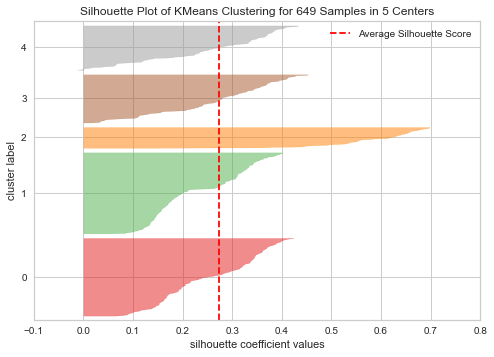

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# check average silhoutte score for K = 5 
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

- From the above we can easily understand that **3 is the good for K value**.

#### Lets build KMeans cluster with the above K value

In [33]:
%time
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


KMeans(n_clusters=3, random_state=0)

In [34]:
# adding kmeans cluster labels to the original dataframe
df["K_means_clusters"] = kmeans.labels_

In [35]:
cluster_profile = df.groupby("K_means_clusters").mean()

In [36]:
cluster_profile["Count_by_Kmean_Cluster"] = (df.groupby("K_means_clusters")["Total_calls_made"].count().values)

In [37]:
# adding labels to Scaled data 
subset_scaled_df["K_means_clusters"] = kmeans.labels_
# cluster_profile = subset_scaled_df.groupby("K_means_clusters").mean()
# cluster_profile["Count_by_Kmean_Cluster"] = (subset_scaled_df.groupby("K_means_clusters")["Total_calls_made"].count().values)

In [38]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_by_Kmean_Cluster
K_means_clusters,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378
1,12239.819005,2.411765,0.945701,3.561086,6.891403,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


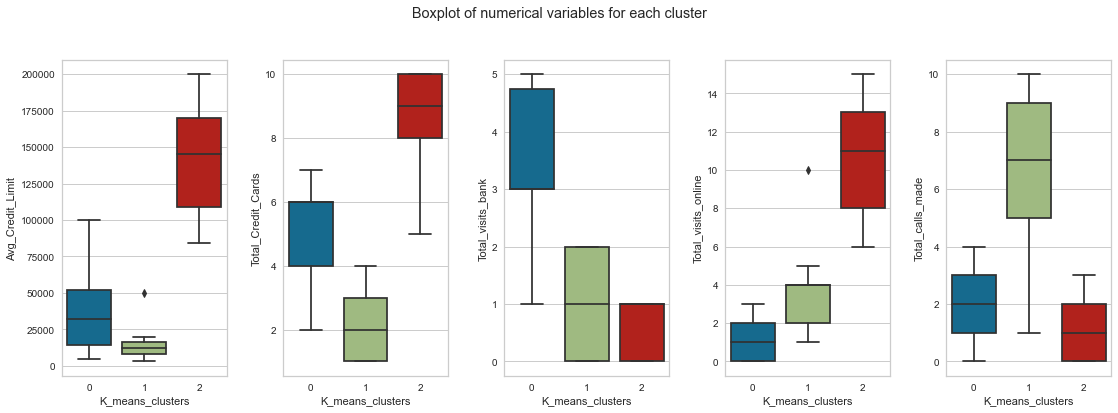

In [39]:
# draw boxplots for each cluster
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["K_means_clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

##### Kmeans Clustering observations:
- Clustor 0: 
    * Number of samples in this cluster is 50. also it has the least number of customers.
    * Though it has least number of customers it has highest Avg_credit_limit, Total_Credit_Cards, Total_Visits_online.
    * It has minimum Total_Calls_Made, Total_Visits_Bank
- Clustor 1: 
    * Number of samples in this cluster is 378. Which has highest number of customers.
    * It has Total_Visits_Bank higher compare to other clusters and Minimum Visits Online.
- Clustor 2:
    * Number of samples in this cluster is 221 which is second largest.
    * It has Total_calls_Made higher compared to other clustors. 
    * it has minimum in total_credit_cards count and Avg_credit_Limit

### Hierarchical Clustering

##### find out the cophenetic correlation for each distance and linkage methods

In [40]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8782863872563746.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8854872581962318.
Cophenetic correlation for Euclidean distance and average linkage is 0.9167886114950704.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9107193273405108.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8976424680148912.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8731535021949083.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9155524410807189.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8894795319631006.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8953021845210315.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7071672885063978.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8455738214836455.
Cophenetic co

In [41]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9167886114950704, which is obtained with Euclidean distance and average linkage.


#### Exploring different Linkage methods using Ecuclidean distance since it has highest cophenetic correlation

In [42]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8782863872563746.
Cophenetic correlation for complete linkage is 0.8854872581962318.
Cophenetic correlation for average linkage is 0.9167886114950704.
Cophenetic correlation for centroid linkage is 0.9140343756244551.
Cophenetic correlation for ward linkage is 0.7756167152597446.
Cophenetic correlation for weighted linkage is 0.9107193273405108.


In [43]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9167886114950704, which is obtained with average linkage.


- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage

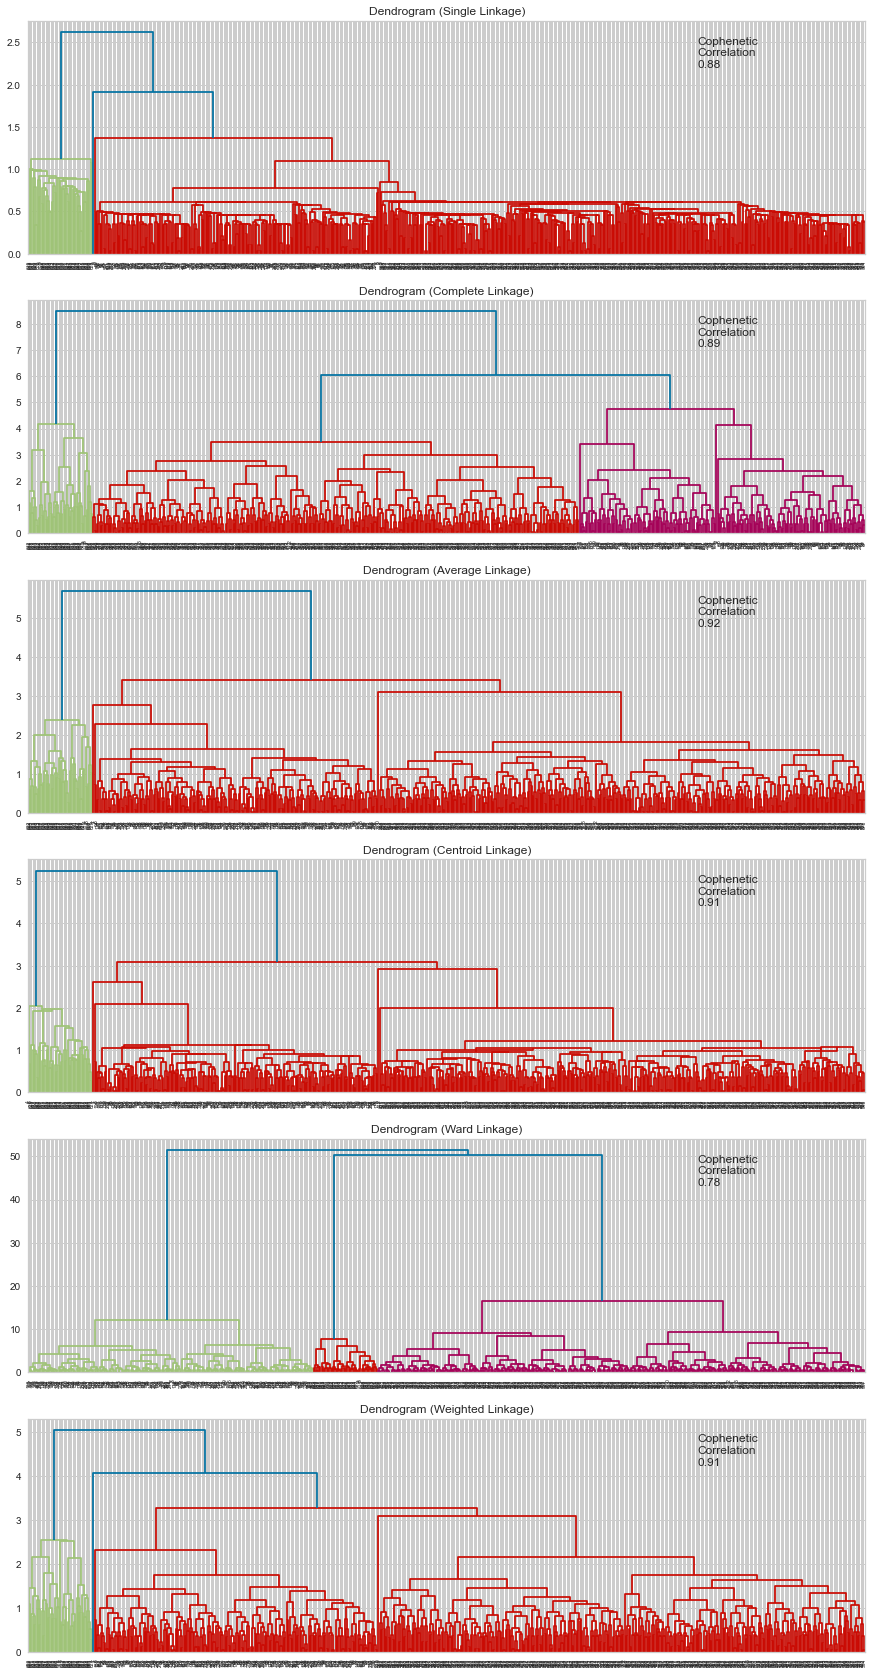

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observation:
- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

##### Build HCmodel

In [45]:
%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


AgglomerativeClustering(linkage='average', n_clusters=3)

In [46]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

##### Cluster Profiling

In [47]:
HCcluster_profile = df.drop('K_means_clusters',axis=1).groupby("HC_Clusters").mean()
#HCcluster_profile.drop('K_means_clusters',axis=1)

In [48]:
HCcluster_profile["count_by_HC_Cluster"] = (
    df.groupby("HC_Clusters")["Total_calls_made"].count().values
)

In [49]:
HCcluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_by_HC_Cluster
HC_Clusters,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


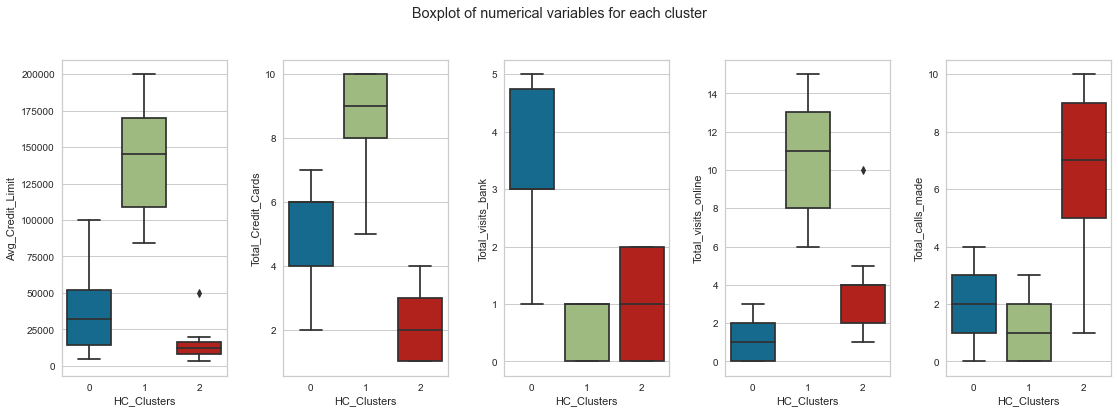

In [50]:
# draw boxplots for each cluster
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

#### Observations HC
- Clustor 0:
    * Number of samples in this cluster is 378. Which has highest number of customers.
    * It has Total_Visits_Bank higher compare to other clusters and Minimum Visits Online.
- Clustor 1:
    * Number of samples in this cluster is 50. also it has the least number of customers.
    * Though it has least number of customers it has highest Avg_credit_limit, Total_Credit_Cards, Total_Visits_online.
    * It has minimum Total_Calls_Made, Total_Visits_Bank
- Clustor 2:
    * Number of samples in this cluster is 221 which is second largest.
    * It has Total_calls_Made higher compared to other clustors.
    * it has minimum in total_credit_cards count and Avg_credit_Limit	

-- Lets try PCA on HCModel

### PCA for Dimensionality Reduction

In [51]:
subset_scaled_df2 = subset_scaled_df.drop(["HC_Clusters","K_means_clusters"], axis=1).copy()

In [52]:
pca = PCA()
pca.fit(subset_scaled_df2)

PCA()

In [53]:
# check variance ratio
pca.explained_variance_ratio_

array([0.45830942, 0.37437508, 0.06362143, 0.05552153, 0.04817254])

Text(0, 0.5, 'Cumulative Explained Variance')

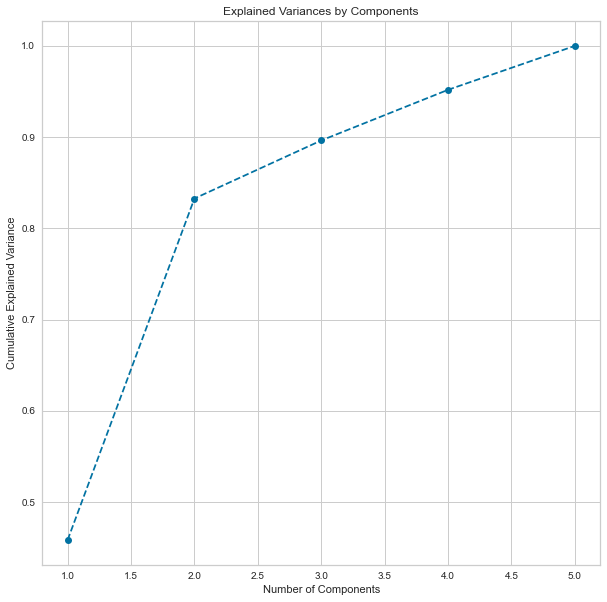

In [54]:
# visualizing the variance explained by individual principal components
plt.figure(figsize=(10, 10))
plt.plot(
    range(1, 6), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

#### For 90% variance explained, the number of components looks to be 3 or 4 (the variance explained for 4 components looks ~90%).

In [55]:
pca = PCA(0.9)
pca.fit(subset_scaled_df2)

PCA(n_components=0.9)

In [56]:
# check variance ratio on 90% variance
pca.explained_variance_ratio_

array([0.45830942, 0.37437508, 0.06362143, 0.05552153])

Text(0, 0.5, 'Cumulative Explained Variance')

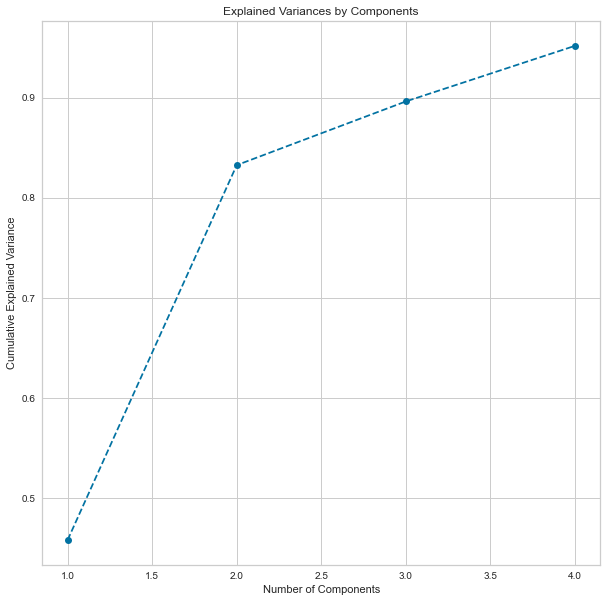

In [57]:
# plot diagram on reduced dimentions
plt.figure(figsize=(10, 10))
plt.plot(
    range(1, 5), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [58]:
# lets transform the data using PCA which has reduced dimentions
subset_pca = pca.transform(subset_scaled_df2)
subset_pca_df = pd.DataFrame(subset_pca)

#### Hierarchical Clustering on lower-dimensional data

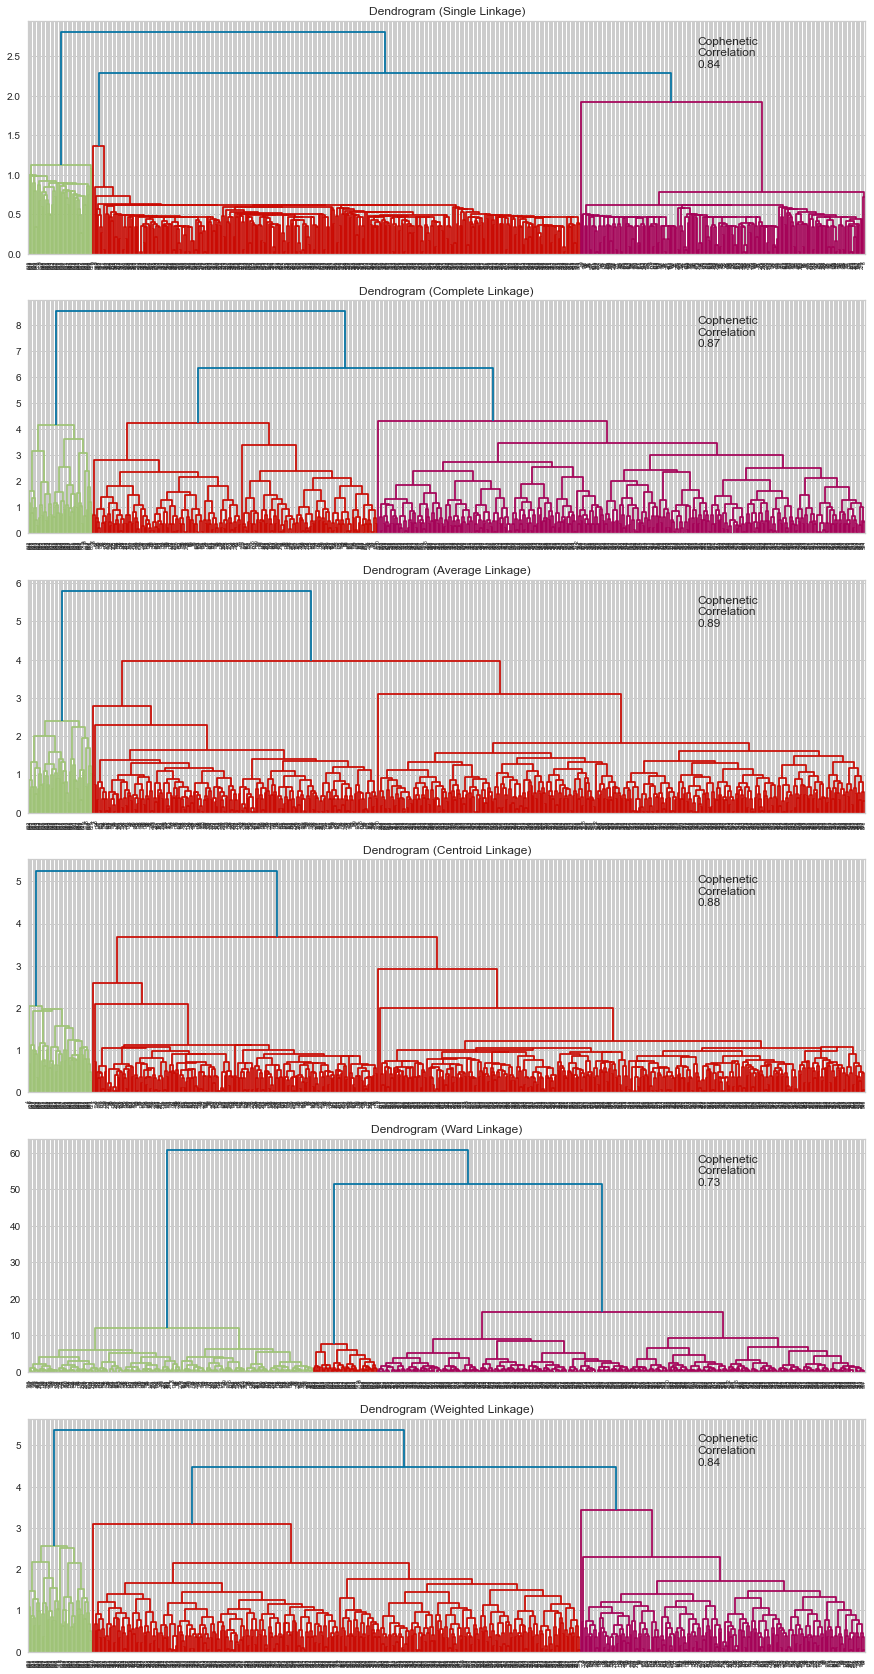

In [59]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_pca_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- From the above dendograms its clearly seen that 3 possible clusters.
- Average Linkage metho has higher cophenitic correlation(0.89)
- lets build HCModel with 3 clusters using Average linkage and Euclidean distance

In [60]:
%time
hc_pca = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
hc_labels = hc_pca.fit_predict(subset_pca)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [61]:
# adding hierarchical cluster labels to the original dataframe
df2 = df.drop(["HC_Clusters","K_means_clusters"], axis=1)
df2["PCA_HC_Clusters"] = hc_labels

In [62]:
# cluster Profiling
cluster_profile_PCA = df2.groupby("PCA_HC_Clusters").mean()
cluster_profile_PCA["count_in_each_segments"] = (
    df2.groupby("PCA_HC_Clusters")["Total_calls_made"].count().values
)

In [63]:
# PCA Cluster Profile
cluster_profile_PCA.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
PCA_HC_Clusters,,,,,,
0,12660.633484,2.402715,0.941176,3.556561,6.873303,221
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,33825.396825,5.523810,3.486772,0.984127,2.002646,378


#### Observation:
- Cluster 0:
    * Number of samples in this cluster is 221 which is second largest.
    * It has Total_calls_Made higher compared to other clustors.
    * it has minimum in total_credit_cards count and Avg_credit_Limit

- Clustor 1:
    * Number of samples in this cluster is 50. also it has the least number of customers.
    * Though it has least number of customers it has highest Avg_credit_limit, Total_Credit_Cards, Total_Visits_online.
    * It has minimum Total_Calls_Made, Total_Visits_Bank
- Clustor 2:
    * Number of samples in this cluster is 378. Which has highest number of customers.
    * It has Total_Visits_Bank higher compare to other clusters and Minimum Visits Online.
    

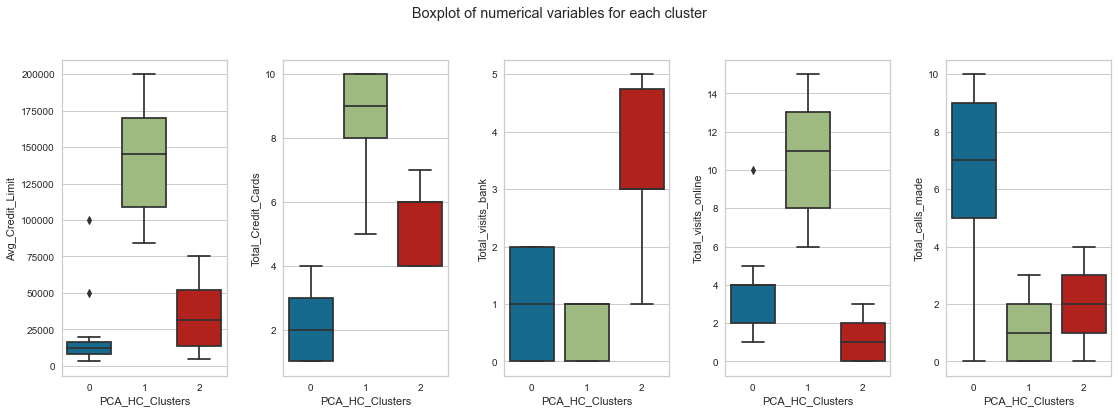

In [64]:
# draw boxplots for each cluster
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[num_cols[counter]], x=df2["PCA_HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Comparision between Kmeans, Hierarchial Clustering , PCA clustering

In [65]:
# Kmeans Cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_by_Kmean_Cluster
K_means_clusters,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378
1,12239.819005,2.411765,0.945701,3.561086,6.891403,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [66]:
# HC cluster profile
HCcluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_by_HC_Cluster
HC_Clusters,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


In [67]:
# PCA Cluster Profile
cluster_profile_PCA.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
PCA_HC_Clusters,,,,,,
0,12660.633484,2.402715,0.941176,3.556561,6.873303,221
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,33825.396825,5.523810,3.486772,0.984127,2.002646,378


- Time taken : 
    * Since we have very less number of samples(660), the time taken for Kmeans & HCmodel doesnot show much difference in execution time{~ 3 µs)
- Cluster comparision: 
    * Even though we have same number of clusters, Samples are assigned to different clusters in HCmodel and Kmeans.
        - For example cluster 0 in Kmeans has minimum number of customers (50) with highest Average credit limit are assined to Cluster1 in HCModel/ PCA.
        - Cluster 1 in Kmeans has highest customers(378) with higher Total_visits_bank is assigned to cluster 0 in HCModel and cluster2 in PACHCModel.
        - Cluster 2 in Kmeans has 2nd highest customers(221) with highest Total_calls_made are assined to Cluster2 again in HCmodel and Cluster0 in PCAHCModel


### Conclusion 
- Considering any one of the models(Kmeans or HC) one of the clusters has 50 customers. Customers in this cluster has more credit limit, more credit cards, and total visits online.
- Another cluster where we have 378 customers has more bank visits very less online visits.
- Another cluster where we have 221 customers has Total calls made higher and minimum number of credit cards and minimum credit limit.

#### Recommendations
* Bank Should focus on the customer Group(cluster) where there are 221 customers. Seems like they were offered minimum credit limit. Also improving the customer service since the total number of calls made is higer compared to other clusters. Also offer them new credit cards.
* Bank should help the cusomers(Cluster with 378 customers) to use online services since these customers visits online least compared to other clusters. Also bank can offer new credit cards with higher credit limit
